In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#global parameters
batch_size=10
nb_epochs=10

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
dset=torchvision.datasets.CIFAR10(root="Cifar10",train=True,download=True,transform=transform)
train_size=int(0.9*len(dset))
test_size=len(dset)-train_size
train_dset,test_dset=data.random_split(dset,[train_size,test_size])
train_loader=data.DataLoader(train_dset,batch_size=batch_size)
test_loader=data.DataLoader(test_dset,batch_size=batch_size)

Files already downloaded and verified


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [6]:
net=Net()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [7]:
train_loss=[]
test_loss=[]
pepoch=[]
for epoch in range(nb_epochs):  # loop over the dataset multiple times
    print("epoch %d"%(epoch))
    pepoch.append(epoch)
    running_loss = 0.0
    net.train()
    for i,data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs,labels=data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # collect statistics
        running_loss+=loss.item()
    nloss=running_loss/train_size
    print("normalized train loss : %f"%(nloss))
    train_loss.append(nloss)
            
    #testing
    net.eval() 
    running_loss=0.0
    for i,data in enumerate(test_loader , 0):
        inputs,labels=data
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        running_loss+=loss.item()
    nloss=running_loss/test_size
    print("normalized test loss : %f"%(nloss))
    test_loss.append(nloss)
        

epoch 0
normalized train loss : 0.199492
normalized test loss : 0.161015
epoch 1
normalized train loss : 0.150177
normalized test loss : 0.138275
epoch 2
normalized train loss : 0.131783
normalized test loss : 0.127182
epoch 3
normalized train loss : 0.121019
normalized test loss : 0.120999
epoch 4
normalized train loss : 0.113297
normalized test loss : 0.117583
epoch 5
normalized train loss : 0.107152
normalized test loss : 0.114653
epoch 6
normalized train loss : 0.101643
normalized test loss : 0.114152
epoch 7
normalized train loss : 0.096766
normalized test loss : 0.116526
epoch 8
normalized train loss : 0.092390
normalized test loss : 0.116727
epoch 9
normalized train loss : 0.088298
normalized test loss : 0.117789


In [8]:
torch.save(net.state_dict(),"cifar_net.pth")

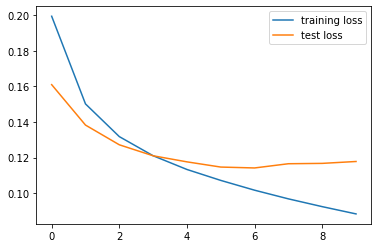

In [9]:
plt.plot(pepoch,train_loss,label="training loss")
plt.plot(pepoch,test_loss,label="test loss")
plt.legend()
plt.show()

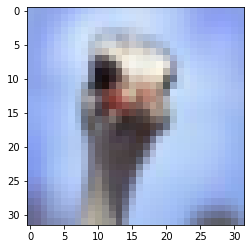

class 2 label bird prediction 2 label bird


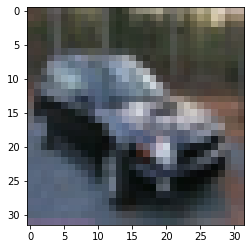

class 1 label car prediction 1 label car


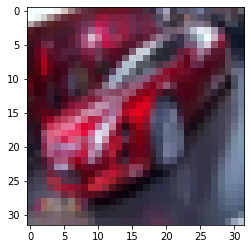

class 1 label car prediction 1 label car


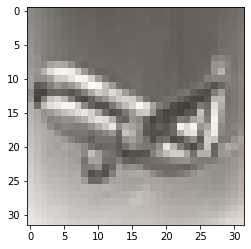

class 0 label plane prediction 0 label plane


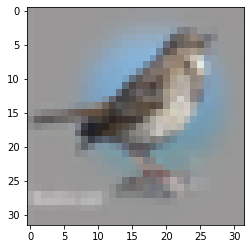

class 2 label bird prediction 2 label bird


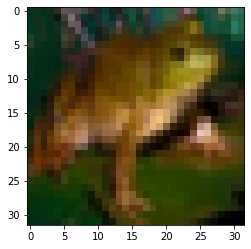

class 6 label frog prediction 6 label frog


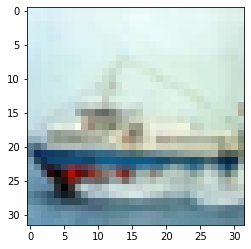

class 8 label ship prediction 8 label ship


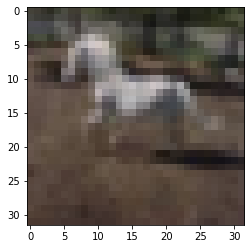

class 7 label horse prediction 7 label horse


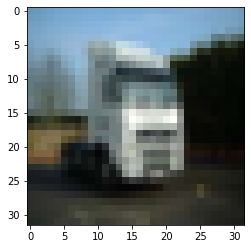

class 9 label truck prediction 9 label truck


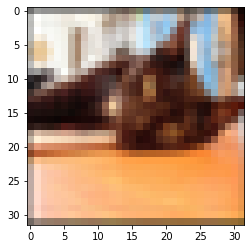

class 3 label cat prediction 0 label plane


In [11]:
def imshow(img):
    img=torchvision.utils.make_grid(img)
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()   # convert from tensor
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
net.eval()

dataiter=iter(test_loader)
inputs,labels=dataiter.next()

outputs=net(inputs)
loss=criterion(outputs,labels)

for i in range(10):
    imshow(inputs[i])
    numclass=labels[i].numpy()
    pred=np.argmax(outputs[i].detach().numpy())
    print("class %d label %s prediction %d label %s"%(numclass,classes[numclass],pred,classes[pred]))
    #print(outputs[i])

        